In [2]:
# to use dataframes
import pandas as pd
#to use np arrays
import numpy as np

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
from datetime import datetime
from datetime import timedelta
import math


In [3]:
train_df = pd.read_csv('train.csv.zip')
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [4]:
test_df = pd.read_csv('test.csv.zip')
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [5]:
df_store = pd.read_csv('stores.csv') #store data
df_train = pd.read_csv('train.csv.zip') # train set
df_features = pd.read_csv('features.csv.zip') #external information

In [6]:
df_store.head()


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
df_train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df_features.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
# Merge the three datasets on a common column
merged_df = pd.merge(df_store, df_train, on='Store')
merged_df = pd.merge(merged_df, df_features, on=['Store', 'Date'])

# Display the merged dataset
print(merged_df.head())

   Store Type    Size  Dept        Date  Weekly_Sales  IsHoliday_x  \
0      1    A  151315     1  2010-02-05      24924.50        False   
1      1    A  151315     2  2010-02-05      50605.27        False   
2      1    A  151315     3  2010-02-05      13740.12        False   
3      1    A  151315     4  2010-02-05      39954.04        False   
4      1    A  151315     5  2010-02-05      32229.38        False   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        NaN        NaN        NaN        NaN   
1        42.31       2.572        NaN        NaN        NaN        NaN   
2        42.31       2.572        NaN        NaN        NaN        NaN   
3        42.31       2.572        NaN        NaN        NaN        NaN   
4        42.31       2.572        NaN        NaN        NaN        NaN   

   MarkDown5         CPI  Unemployment  IsHoliday_y  
0        NaN  211.096358         8.106        False  
1        NaN  211.096358  

In [10]:
merged_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [11]:
class DataUnderstanding(object):
    """This is a class that does basic data understanding"""
    def __init__(self, df):
        self.shape = df.shape
        self.info = df.info
        self.duplicates = df.duplicated().sum()
        self.missing = df.isna().sum()
        self.types = df.dtypes

In [12]:
#instantiating the classes
dataund= DataUnderstanding(merged_df)

In [13]:
#Getting the shape of the dataset
print(f"shape:{dataund.shape}")

shape:(421570, 17)


In [14]:
#getting the info of the data
print(dataund.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Dept          421570 non-null  int64  
 4   Date          421570 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday_x   421570 non-null  bool   
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [15]:
#getting the missing values
dataund.missing

Store                0
Type                 0
Size                 0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [16]:
#checking the data types
dataund.types

Store             int64
Type             object
Size              int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday_x        bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_y        bool
dtype: object

There are integers, floats, bools, objects

In [17]:
#checking for duplicates
print(f"Duplictes:{dataund.duplicates.sum()}")

Duplictes:0


There are no duplicates

### Data Preparation

##### Validity


In [18]:
#Removing duplicated column
merged_df.drop(['IsHoliday_y'], axis=1, inplace=True)

In [19]:
#rename column
merged_df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [20]:
#last ready set
merged_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,A,151315,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,A,151315,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,A,151315,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [21]:
## Handdling Date features
## Extracting day,montha nd year from Date
merged_df['Day']=pd.DatetimeIndex(merged_df['Date']).day
merged_df['Month']=pd.DatetimeIndex(merged_df['Date']).month
merged_df['Year']=pd.DatetimeIndex(merged_df['Date']).year

In [22]:
merged_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
1,1,A,151315,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
2,1,A,151315,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
3,1,A,151315,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
4,1,A,151315,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010


In [23]:
merged_df['Date'].head(5).append(merged_df['Date'].tail(5)) # to see first and last 5 rows.

<ipython-input-23-f172b947f88b>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df['Date'].head(5).append(merged_df['Date'].tail(5)) # to see first and last 5 rows.


0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

Our data is from 5th of February 2010 to 26th of October 2012.


### Completeness

In [24]:
#Filling null's with 0
merged_df = merged_df.fillna(0)

In [25]:
#checking the null values
merged_df.isna().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
dtype: int64

#### IsHoliday Column

In [26]:
df_holiday = merged_df.loc[merged_df['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

There are 10 holidays

In [27]:
df_not_holiday = merged_df.loc[merged_df['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133

There are 133 days for non Holiday

There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

After the 07-Sep-2012 holidays are in test set for prediction. When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

In [28]:
# Super bowl dates in train set
merged_df.loc[(merged_df['Date'] == '2010-02-12')|(merged_df['Date'] == '2011-02-11')|(merged_df['Date'] == '2012-02-10'),'Super_Bowl'] = True
merged_df.loc[(merged_df['Date'] != '2010-02-12')&(merged_df['Date'] != '2011-02-11')&(merged_df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [29]:
# Labor day dates in train set
merged_df.loc[(merged_df['Date'] == '2010-09-10')|(merged_df['Date'] == '2011-09-09')|(merged_df['Date'] == '2012-09-07'),'Labor_Day'] = True
merged_df.loc[(merged_df['Date'] != '2010-09-10')&(merged_df['Date'] != '2011-09-09')&(merged_df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [30]:
# Thanksgiving dates in train set
merged_df.loc[(merged_df['Date'] == '2010-11-26')|(merged_df['Date'] == '2011-11-25'),'Thanksgiving'] = True
merged_df.loc[(merged_df['Date'] != '2010-11-26')&(merged_df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [31]:
#Christmas dates in train set
merged_df.loc[(merged_df['Date'] == '2010-12-31')|(merged_df['Date'] == '2011-12-30'),'Christmas'] = True
merged_df.loc[(merged_df['Date'] != '2010-12-31')&(merged_df['Date'] != '2011-12-30'),'Christmas'] = False

### Exploratory Data Analysis

#### Univariate Analysis

The number of data points in the temperature variable is 421,570.
The average temperature in the dataset is approximately 60.09 degrees.
The temperature values in the dataset are quite spread out, with a standard deviation of 18.45 degrees. This indicates that there is a significant amount of variability in the temperature data.
The smallest temperature value in the dataset is -2.06 degrees.
25% of the temperature values in the dataset are less than or equal to 46.68 degrees.
Half of the temperature values in the dataset are less than or equal to 62.09 degrees.
75% of the temperature values in the dataset are less than or equal to 74.28 degrees.
The largest temperature value in the dataset is 100.14 degrees.

In [32]:
class UnivariateAnalysis(object):
        def __init__(self, data):
           self.data = data
        def histplot(self, col):
                plt.figure(figsize=(15, 5))
                sns.histplot(data=self.data, x=col, kde=True)
                plt.title(f"{col} Distribution")
                plt.show()
        def countplot(self, col):
                plt.figure(figsize=(15, 5))
                sns.countplot(data=self.data, x=col)
                plt.title(f"{col} Countplot")
                plt.show()
        def boxplot(self, col):
                plt.figure(figsize=(15, 5))
                sns.boxplot(data=self.data, x=col)
                plt.title(f"{col} Boxplot")
                plt.show()
        def barplot(self, col):
                plt.figure(figsize=(15, 5))
                sns.barplot(data=self.data, x=col, y=self.data.index)
                plt.title(f"{col} Barplot")
                plt.show()
                print(self.data[col].describe())

In [33]:
eda=UnivariateAnalysis(merged_df)

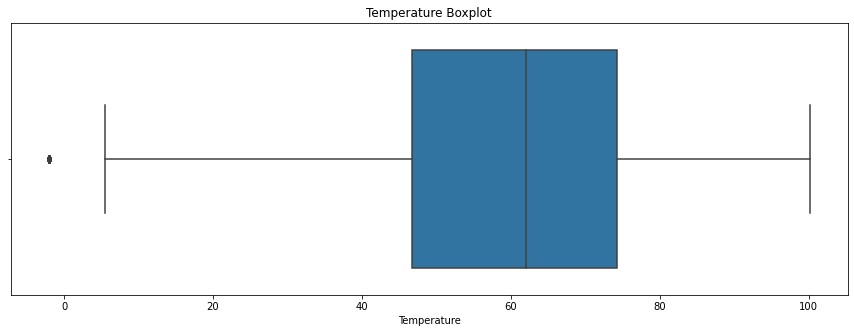

In [34]:
eda.boxplot('Temperature')

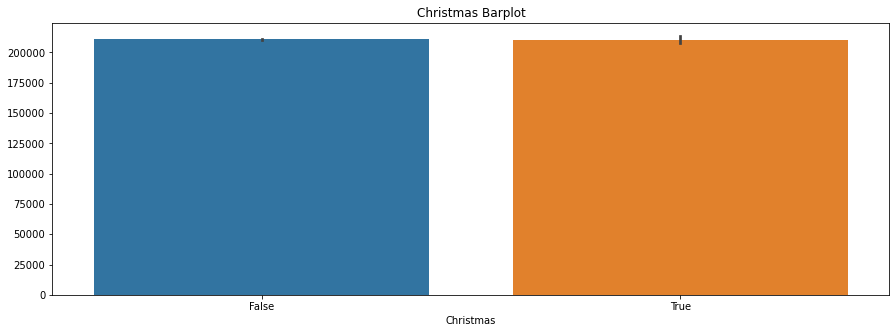

count     421570
unique         2
top        False
freq      415624
Name: Christmas, dtype: object


In [35]:
eda. barplot('Christmas')

#### Bivariate Analysis

In [36]:
#A class that performs bivariate analysis
class BivariateAanalysis(object):
    def __init__(self, data):
           self.data = data
           
    def scatterplot(self, x_col, y_col):
        plt.figure(figsize=(15, 5))
        sns.scatterplot(data=self.data, x=x_col, y=y_col)
        plt.title(f"{x_col} vs {y_col}")
        plt.show()

    def regplot (self, x_col, y_col):
        plt.figure(figsize=(15, 5))
        sns.regplot(data=self.data, x=x_col, y=y_col)
        plt.title(f"{x_col} vs {y_col}")
        plt.show()

    def boxplots(self, x_col, y_col):
        plt.figure(figsize=(15, 5))
        sns.boxplot(data=self.data, x=x_col, y=y_col)
        plt.title(f"{x_col} vs {y_col}")
        plt.show()

    def barplots(self, x_col, y_col):
        plt.figure(figsize=(15, 5))
        sns.barplot(data=self.data, x=x_col, y=y_col)
        plt.title(f"{x_col} vs {y_col}")
        plt.show()

In [37]:
#instantiating
biveda=BivariateAanalysis(merged_df)

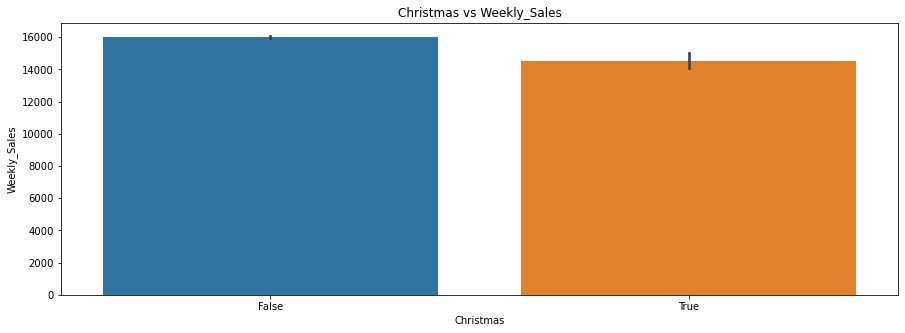

In [38]:
# Christmas holiday vs not-Christmas
biveda.barplots('Christmas', 'Weekly_Sales')

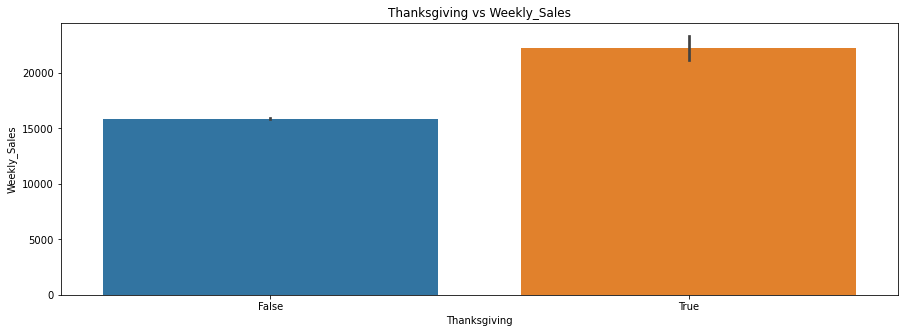

In [39]:
#Thanksgiving holiday vs not-thanksgiving
biveda.barplots('Thanksgiving', 'Weekly_Sales')

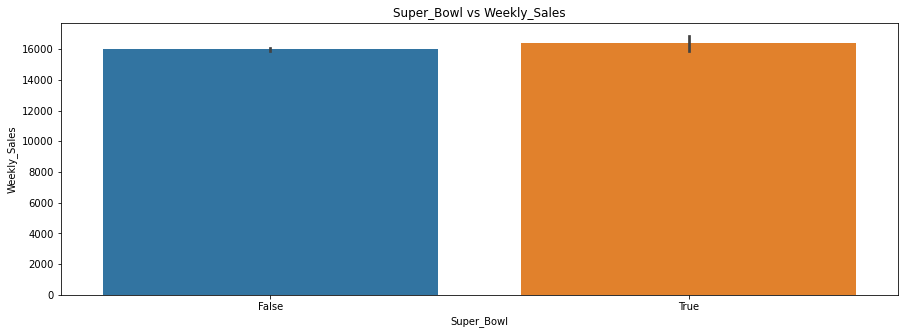

In [40]:
# Super bowl holiday vs not-super bowl
biveda.barplots('Super_Bowl', 'Weekly_Sales')

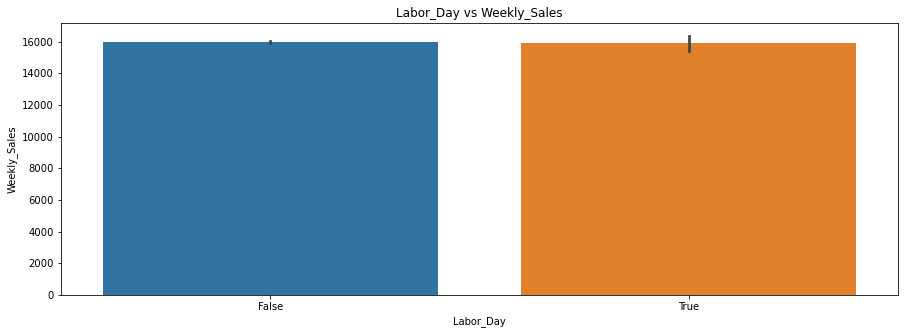

In [41]:
# Labor day holiday vs not-labor day
biveda.barplots('Labor_Day', 'Weekly_Sales')

It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving. I think, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

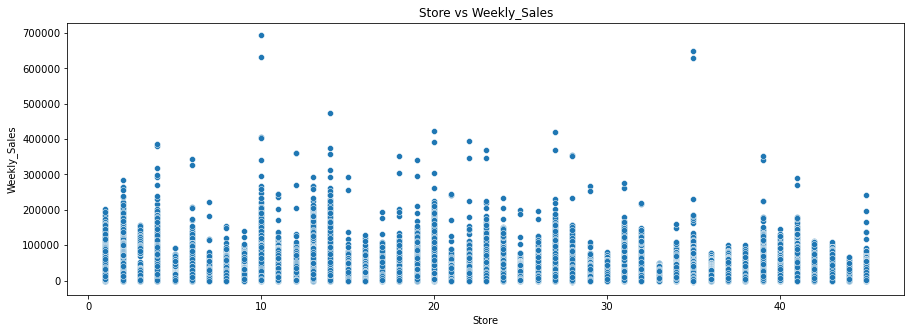

In [42]:
biveda.scatterplot('Store', 'Weekly_Sales')

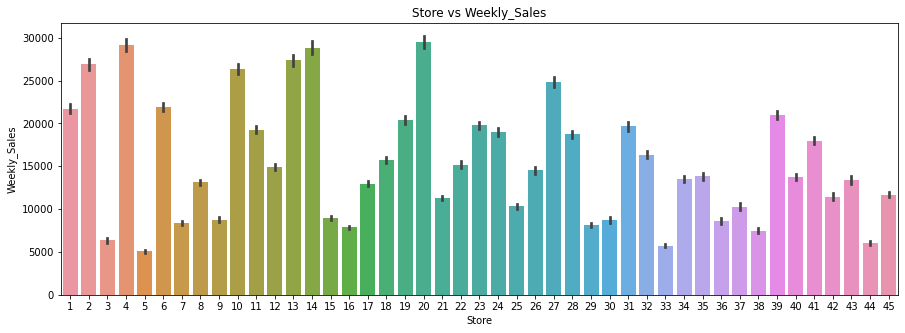

In [43]:
biveda.barplots('Store', 'Weekly_Sales')

Some stores has higher sales but on average store 20 is the best and 4 and 14 following it.

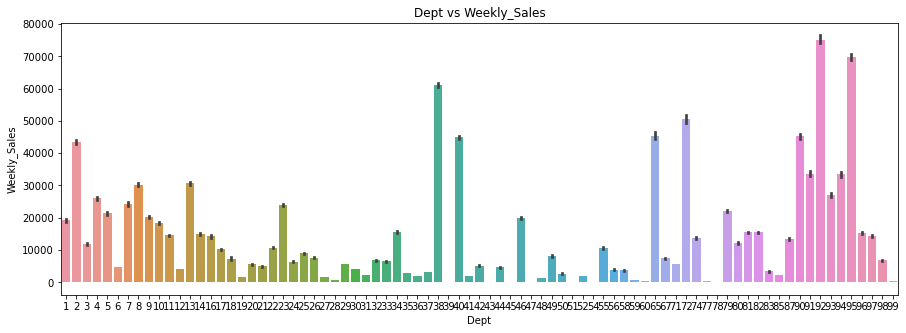

In [44]:
biveda.barplots('Dept', 'Weekly_Sales')

92 is higher.

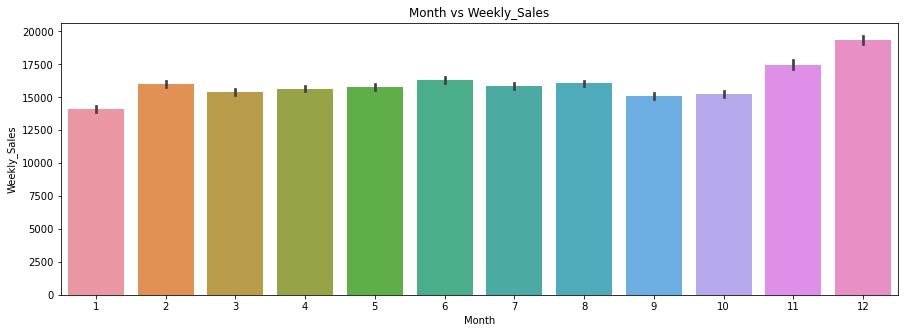

In [45]:
biveda.barplots('Month', 'Weekly_Sales')

The best sales are in December and November, as expected

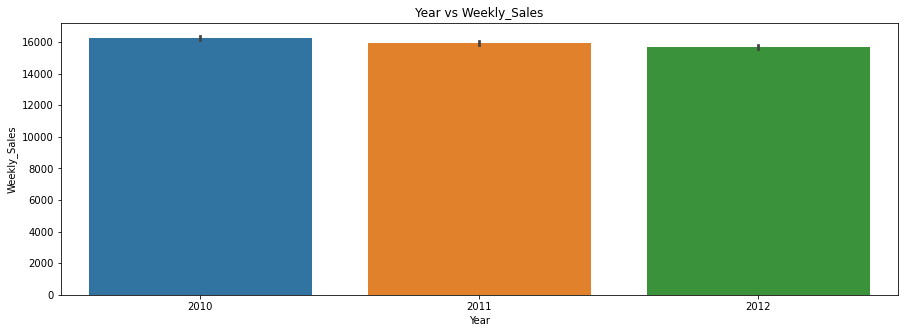

In [46]:
biveda.barplots('Year', 'Weekly_Sales')

2010 has the highest sales, followed by 2011 then 2012

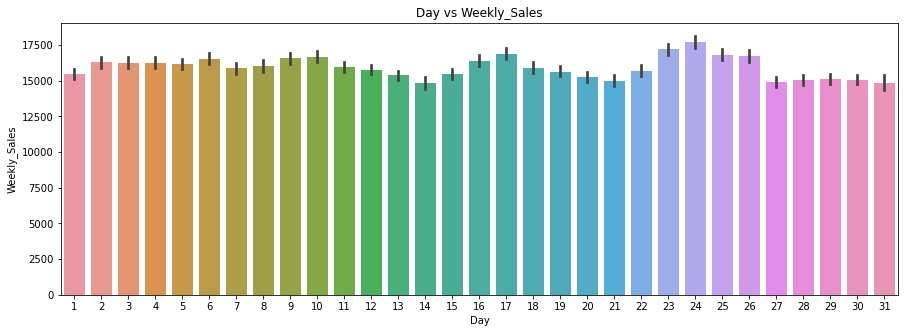

In [47]:
biveda.barplots('Day', 'Weekly_Sales')

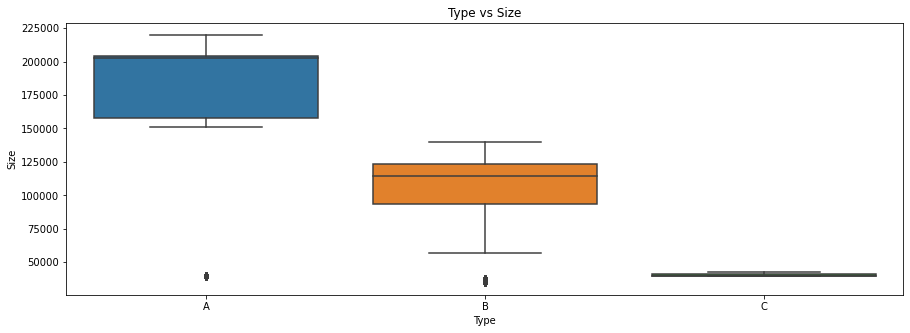

In [48]:
biveda.boxplots('Type', 'Size')

#### Multivariate Analysis

In [49]:
class MultivariateAnalysis(object):
    def __init__(self, data):
        self.data = data
        
    def pairplot(self, cols, hue=None):
        plt.figure(figsize=(15, 5))
        sns.pairplot(data=self.data[cols], hue=hue)
        plt.title(f"{', '.join(cols)} Pairplot")
        plt.show()
    def barplots(self, cols, hue=None):
        plt.figure(figsize=(15, 5))
        sns.barplot(data=self.data[cols], hue=hue)
        plt.title(f"{', '.join(cols)} Barplot")
        plt.show()
    def heatmap(self, cols, hue=None):
        plt.figure(figsize=(15, 5))
        sns.heatmap(data=self.data[cols].corr(), cmap="coolwarm", annot=True)
        plt.title(f"{', '.join(cols)} Correlation Heatmap")
        plt.show()

In [50]:
class MultivariateAnalysis(object):
    def __init__(self, data):
        self.data = data
    
    def pairplot(self, cols, hue=None):
        plt.figure(figsize=(15, 5))
        sns.pairplot(data=self.data[cols], hue=hue)
        plt.title(f"{', '.join(cols)} Pairplot")
        plt.show()
        
    def barplots(self, cols, hue=None):
        plt.figure(figsize=(15, 5))
        sns.barplot(data=self.data[cols], hue=hue)
        plt.title(f"{', '.join(cols)} Barplot")
        plt.show()
        
    def heatmap(self, cols, hue=None):
        plt.figure(figsize=(15, 15))
        sns.heatmap(data=self.data[cols].corr(), annot=True)
        plt.title(f"{', '.join(cols)} Correlation Heatmap")
        plt.show()
        
    def boxplot(self, cols, hue=None):
        plt.figure(figsize=(15, 5))
        sns.boxplot(data=self.data[cols], hue=hue)
        plt.title(f"{', '.join(cols)} Boxplot")
        plt.show()


In [51]:
# Create an instance of the MultivariateAnalysis class
multieda = MultivariateAnalysis(merged_df)

<ipython-input-50-29d27ea434df>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=self.data[cols].corr(), annot=True)


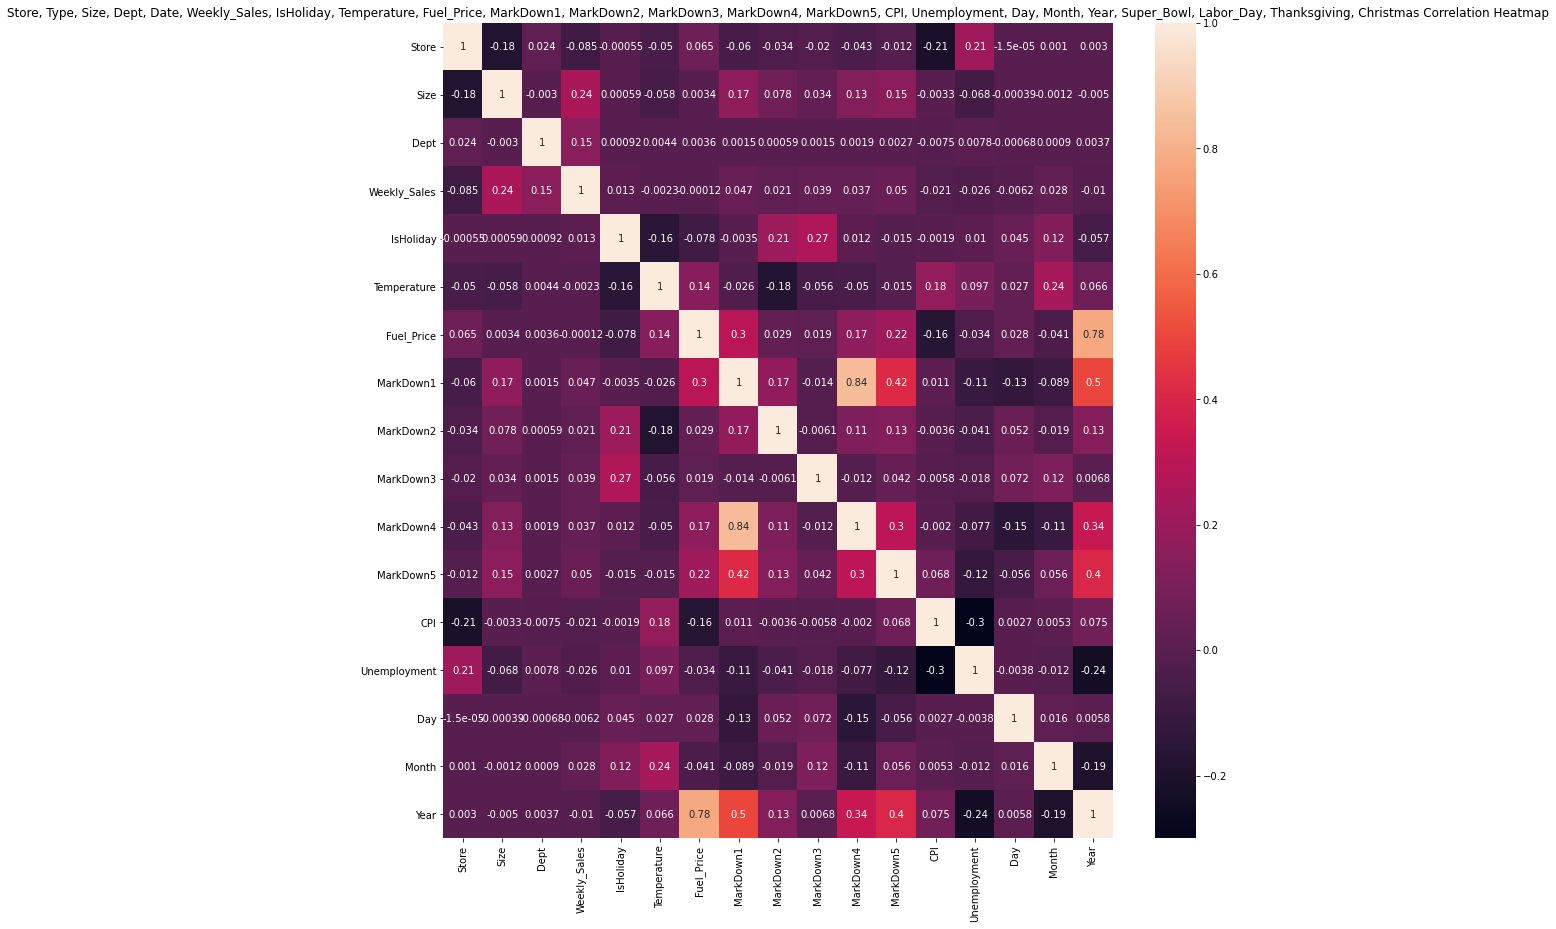

In [52]:
multieda.heatmap(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Day', 'Month', 'Year',
       'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas' ])

As expected, holiday average sales are higher than normal dates.

Christmas holiday introduces as the last days of the year. But people generally shop at 51th week. So, when we look at the total sales of holidays, Thankgiving has higher sales between them which was assigned by Walmart.

Year 2010 has higher sales than 2011 and 2012. But, November and December sales are not in the data for 2012. Even without highest sale months, 2012 is not significantly less than 2010, so after adding last two months, it can be first.

It is obviously seen that week 51 and 47 have higher values and 50-48 weeks follow them. Interestingly, 5th top sales belongs to 22th week of the year. This results show that Christmas, Thankgiving and Black Friday are very important than other weeks for sales and 5th important time is 22th week of the year and it is end of the May, when schools are closed. Most probably, people are preparing for holiday at the end of the May.

January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.

CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales.

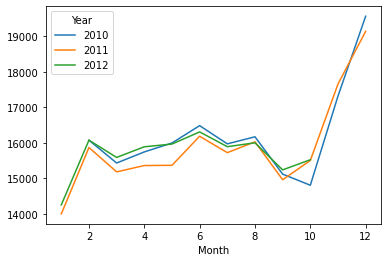

In [53]:
pivot_table = pd.pivot_table(data=merged_df, values='Weekly_Sales', index='Month', columns='Year')
pivot_table.plot();

2011 has lower sales than 2012 generally, but 2012 has no information about November and December which have higher sales

## Modelling


We shall be using Time Series Analysis to Predict the Sales. 

In [54]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Dept          421570 non-null  int64  
 4   Date          421570 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday     421570 non-null  bool   
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  Day           421570 non-null  int64  
 17  Month         421570 non-null  int64  
 18  Year

In [55]:
# turn the Date Column to a Datetime object
merged_df['Date']= pd.to_datetime(merged_df['Date'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Type          421570 non-null  object        
 2   Size          421570 non-null  int64         
 3   Dept          421570 non-null  int64         
 4   Date          421570 non-null  datetime64[ns]
 5   Weekly_Sales  421570 non-null  float64       
 6   IsHoliday     421570 non-null  bool          
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [56]:
# merged_df.set_index('Date', inplace= True)
# merged_df.head()

In [57]:
walmart= merged_df.loc[:, ['Date', 'Weekly_Sales']]
walmart.set_index('Date', inplace= True)
walmart.head()

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-05,50605.27
2010-02-05,13740.12
2010-02-05,39954.04
2010-02-05,32229.38


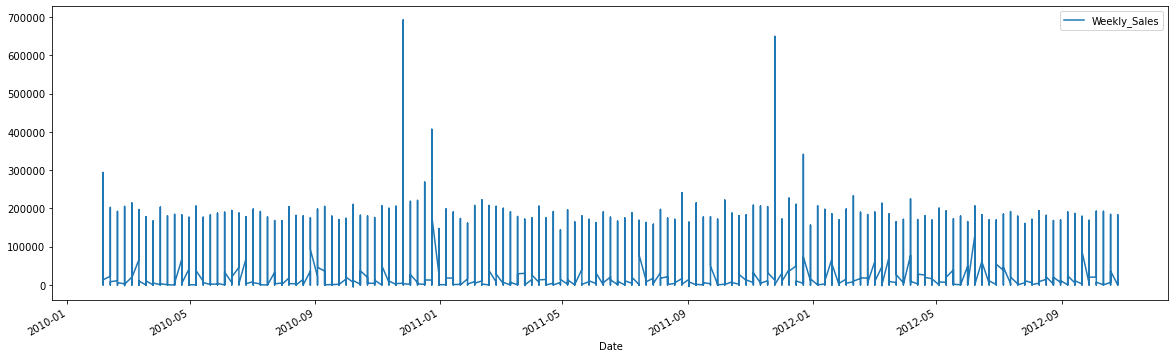

In [58]:
walmart.plot(figsize = (20,6));


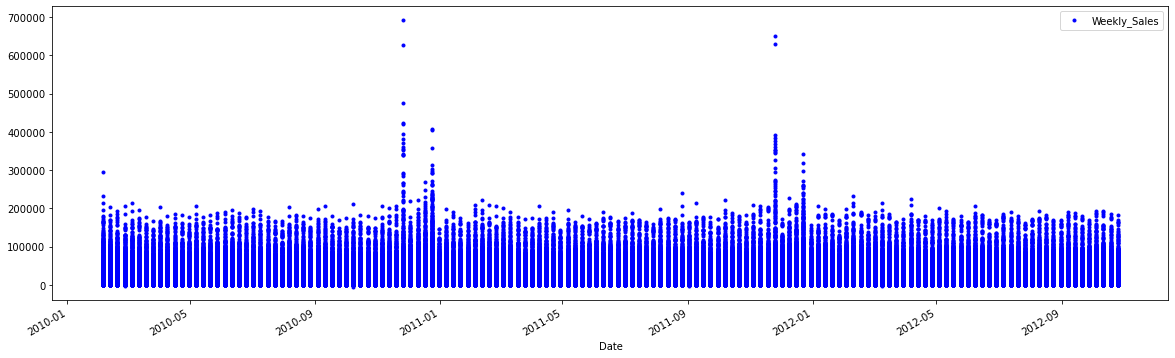

In [59]:
walmart.plot(figsize = (20,6), style = '.b');


In [60]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Weekly_Sales  421570 non-null  float64
dtypes: float64(1)
memory usage: 6.4 MB


In [61]:
# checking for rolling statistics
roll_mean = walmart.rolling(window=8, center=False).mean()
roll_std = walmart.rolling(window=8, center=False).std()


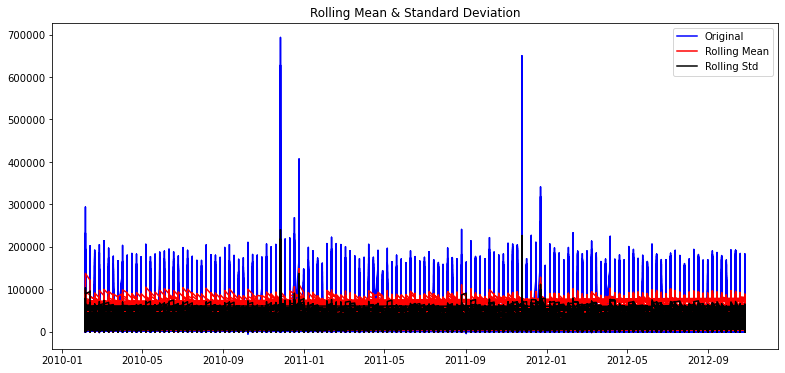

In [62]:
fig = plt.figure(figsize=(13,6))
plt.plot(walmart, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [63]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(walmart)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print('-------------')
print(dfoutput)

(-9.251340872435433, 1.4893921693021785e-15, 97, 421472, {'1%': -3.4303655154786736, '5%': -2.861546857656134, '10%': -2.5667736500803486}, 9439114.82652605)
-------------
Test Statistic                -9.251341e+00
p-value                        1.489392e-15
#Lags Used                     9.700000e+01
Number of Observations Used    4.214720e+05
Critical Value (1%)           -3.430366e+00
Critical Value (5%)           -2.861547e+00
Critical Value (10%)          -2.566774e+00
dtype: float64


The Dickey-Fuller test statistic is significant and very well below a (strict) 0.01 mark. So it seems reasonable to assume this time series is stationary.

In [64]:
monthly_sales = walmart.groupby(pd.Grouper( freq='M')).sum()

# group dataframe by year and sum sales for each year
yearly_sales = walmart.groupby(pd.Grouper(freq='Y')).sum()

In [65]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder


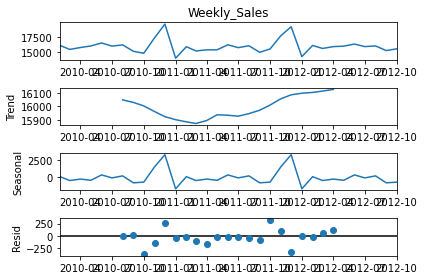

In [66]:
#decompose time series data into seasonal
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(walmart['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.show()

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


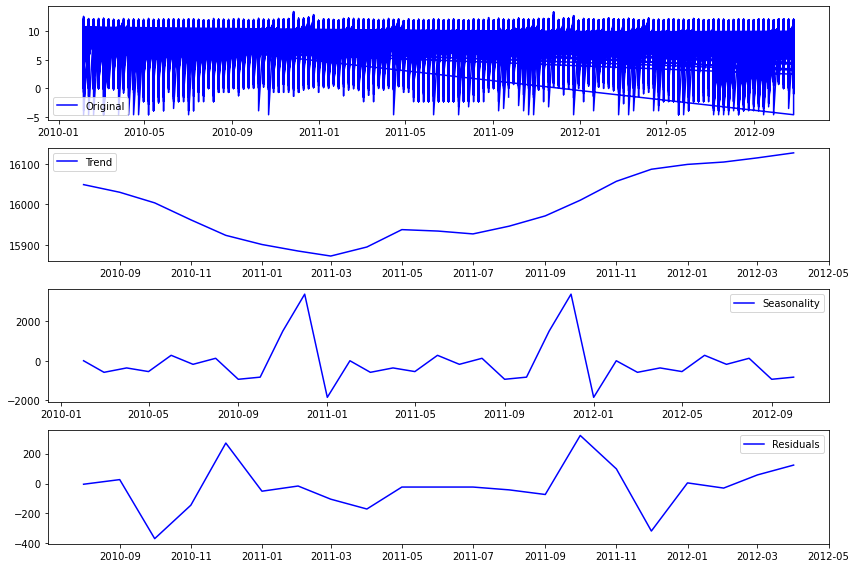

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
walmart.fillna(walmart.mean(), inplace=True)
decomposition = seasonal_decompose(walmart['Weekly_Sales'].resample('MS').mean(), model='additive')

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(walmart), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

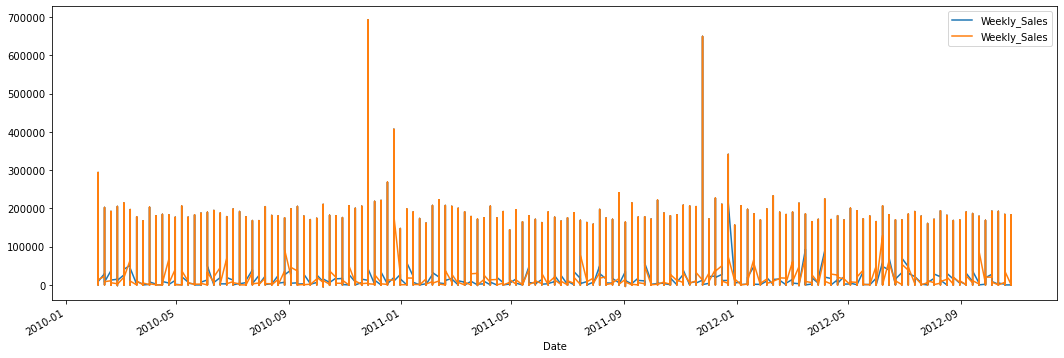

In [68]:
sales = walmart[['Weekly_Sales']]
sales_shift = sales.shift(periods=1)
sales_shift.head()
lag_1 = pd.concat([sales_shift, sales], axis=1)
lag_1.corr()
lag_1.plot(figsize=(18,6));


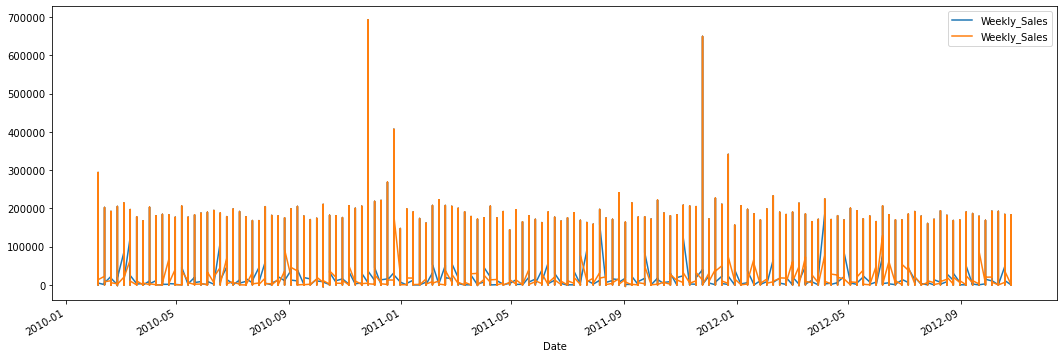

In [69]:
sales_shift_2 = sales.shift(periods=2)

lag_2 = pd.concat([sales_shift_2, sales], axis=1)

lag_2.corr()

lag_2.plot(figsize=(18,6));


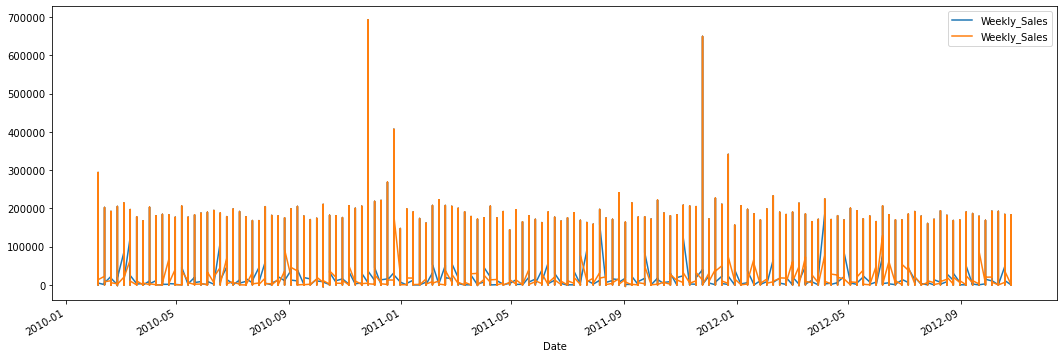

In [70]:
sales_shift_4 = sales.shift(periods=2)

lag_4 = pd.concat([sales_shift_4, sales], axis=1)

lag_4.corr()

lag_4.plot(figsize=(18,6));


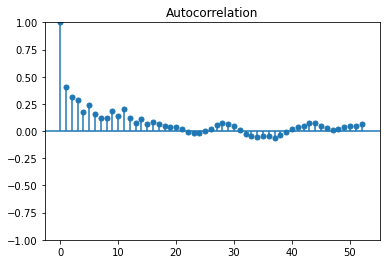

In [71]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(sales, lags=52);

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


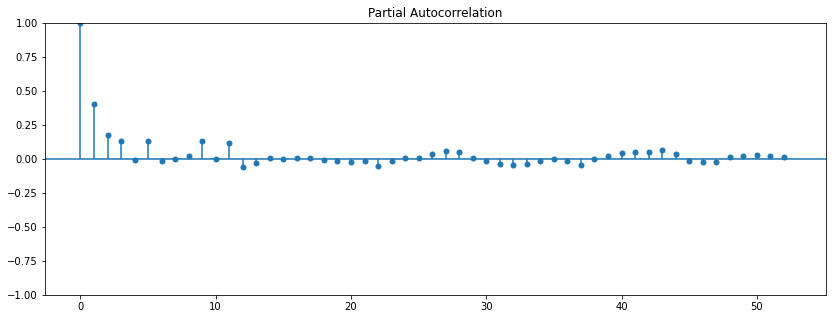

In [72]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(sales, lags=52);

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


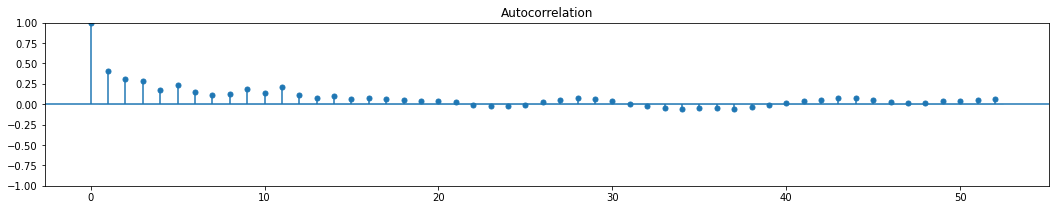

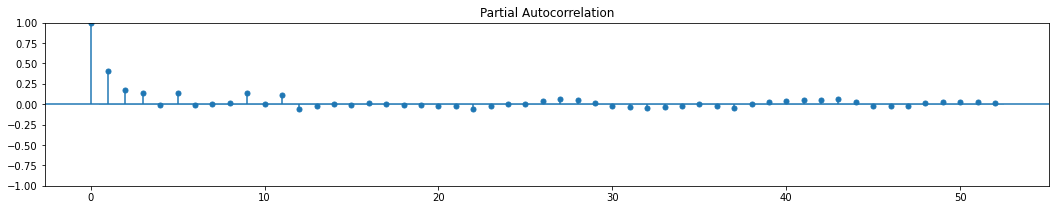

In [73]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(18,3))
plot_acf(sales, ax=ax, lags=52);

fig, ax = plt.subplots(figsize=(18,3))
plot_pacf(sales, ax=ax, lags=52);


In [74]:
merged_df.set_index('Date', inplace= True)


In [75]:
#isolate store one
store_1 = merged_df['Store'] == 1
data = merged_df[store_1]

#creating a weekly sales df with store_1
Weekly_Sales = pd.DataFrame(merged_df['Weekly_Sales'].groupby(store_1.index).sum())

Weekly_Sales.head()

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30


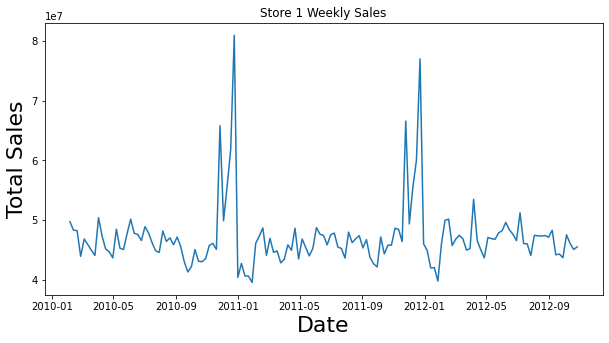

In [76]:
#First, we'll Generate a line plot for Weekly_Sales with time on the x-axis.
# plot
plt.figure(figsize=(10,5))
plt.plot(Weekly_Sales)
plt.xlabel('Date', fontsize=22)
plt.ylabel('Total Sales', fontsize=22)
plt.title('Store 1 Weekly Sales');

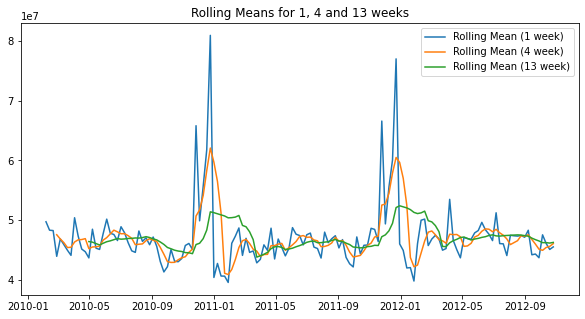

In [77]:
#Let's calculate some rolling means for Weekly_Sales and then plot them on a single set of axes.

# Set a rolling mean with windows of 1, 4, and 13.
rol1ing_1  = Weekly_Sales.rolling(window = 1).mean()
rolling_4  = Weekly_Sales.rolling(window = 4).mean()
rolling_13 = Weekly_Sales.rolling(window = 13).mean()

# Plot
plt.figure(figsize=(10,5))
plt.plot(rol1ing_1, label='Rolling Mean (1 week)')
plt.plot(rolling_4, label='Rolling Mean (4 week)')
plt.plot(rolling_13, label='Rolling Mean (13 week)')

plt.legend(loc='best')

plt.title('Rolling Means for 1, 4 and 13 weeks')
plt.show();

Noticeable trends:

Huge peaks around the holidays followed by huge drops post-holidays.
Total sales seems to be trending upwards for non-holiday periods.

#### 3. Autocorrelations
Autocorrelation: the influence a serial observation has on the observations which follow.

Let's calculate autocorrelation in our Weekly_Sales to see how it differs as lag-weeks vary.



In [78]:
print(f'1 week lag: {round(Weekly_Sales["Weekly_Sales"].autocorr(lag=1),4)}')
print(f'2 week (fortnight) lag: {round(Weekly_Sales["Weekly_Sales"].autocorr(lag=2),4)}')
print(f'4 week (monthly) lag: {round(Weekly_Sales["Weekly_Sales"].autocorr(lag=4),4)}')
print(f'12 week (3 month-quartely) lag: {round(Weekly_Sales["Weekly_Sales"].autocorr(lag=12),4)}')
print(f'26 week half year lag: {round(Weekly_Sales["Weekly_Sales"].autocorr(lag=26),4)}')
print(f'1 year lag: {round(Weekly_Sales["Weekly_Sales"].autocorr(lag=52),4)}')

1 week lag: 0.3378
2 week (fortnight) lag: 0.221
4 week (monthly) lag: 0.1744
12 week (3 month-quartely) lag: -0.1074
26 week half year lag: 0.0803
1 year lag: 0.9262


### Correlations
There's an incredibly high correlation between year-on-year weekly sales.
There's a decent correlation between week-on-week sales.


In [79]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


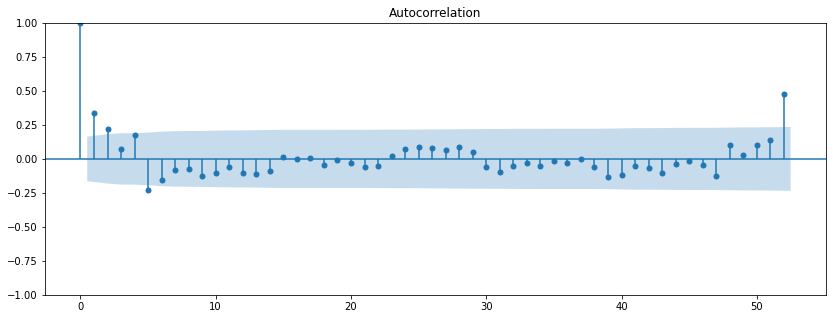

In [80]:
plot_acf ( Weekly_Sales, lags=52);


/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


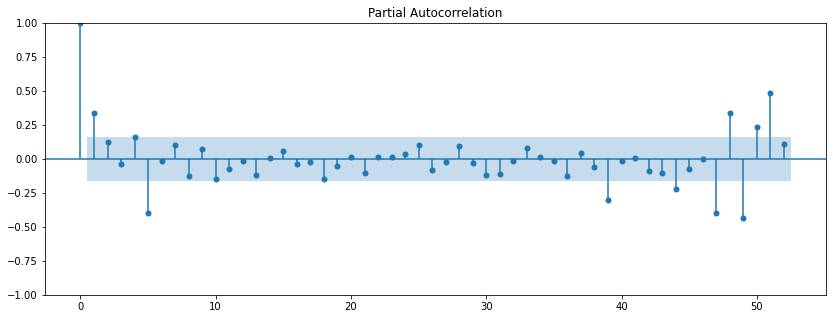

In [81]:
plot_pacf(Weekly_Sales, lags=52);


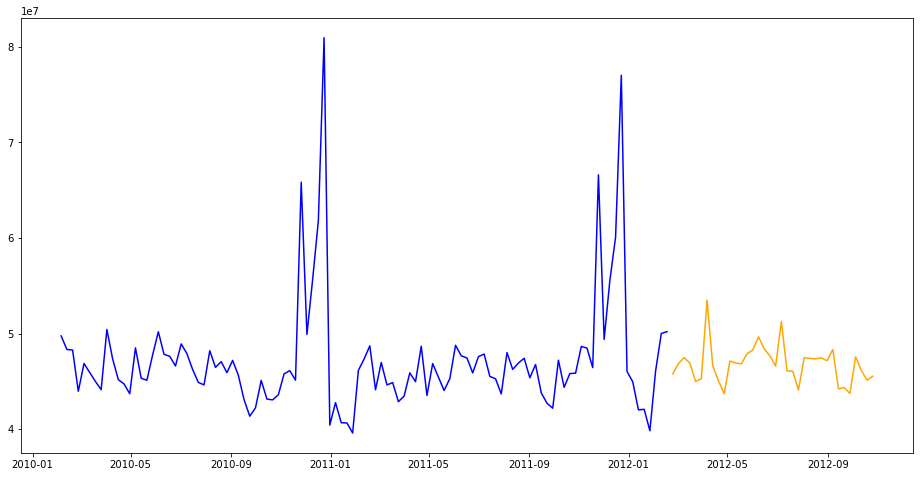

In [82]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(Weekly_Sales, test_size = 0.25, shuffle = False) # Shuffle = False is IMPORTANT!
def train_test_plot(train, test):
    plt.figure(figsize=(16, 8))
    plt.plot(train, c='blue')
    plt.plot(test, c='orange');

train_test_plot(train, test)


Number of AR (Auto-Regressive) terms (p)
p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to rain tomorrow if it has been raining for past 3 days. AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

Number of Differences (d)
d is the Integrated component of an ARIMA model. This value is concerned with the amount of differencing as it identifies the number of lag values to subtract from the current observation. Intuitively, this would be similar to stating that it is likely to rain tomorrow if the difference in amount of rain in the last n days is small.

Number of MA (Moving Average) terms (q)
q is the moving average part of the model which is used to set the error of the model as a linear combination of the error values observed at previous time points in the past. MA terms form lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

These three distinct integer values, (p, d, q), are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation ARIMA(p, d, q). Together these three parameters account for seasonality, trend, and noise in datasets:

(p, d, q) are the non-seasonal parameters described above.
(P, D, Q) follow the same definition but are applied to the seasonal component of the time series.
The term s is the periodicity of the time series (4 for quarterly periods, 12 for yearly periods, etc.).


In [88]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm


In [89]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

AIC (Akaike Information Criterion) as Regularization Measure
For evaluating the model, we shall use the AIC (Akaike Information Criterion) value, which is provided by ARIMA models fitted using statsmodels library. The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value. To achieve this, perform following tasks:

Initialize an empty list to store results
Iterate through all the paramaters in pdq with parameters in seasonal pdq (nested loop ) to create a grid
Run SARIMAX from statsmodels for each iteration. Details can be found here. Set enforce_stationarity and enforce_invertibility to False
Get the results in each iteration with model.fit() and store the AIC values
Find the lowest AIC and select parameters for further analysis


In [90]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value

comb =  (2,0,2)

ans = []
for combs in pdqs:
    try:
        mod = sm.tsa.statespace.SARIMAX(train,
                                        order = comb,
                                        seasonal_order=combs,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        output = mod.fit()
       
        ans.append([comb, combs, output.aic])
        print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
        
    except:
        continue

ARIMA (2, 0, 2) x (0, 0, 0, 52): AIC Calculated=3691.588635206707
ARIMA (2, 0, 2) x (0, 0, 1, 52): AIC Calculated=1757.6644052957104
ARIMA (2, 0, 2) x (0, 0, 2, 52): AIC Calculated=14.0
ARIMA (2, 0, 2) x (0, 1, 0, 52): AIC Calculated=1658.1166393949775
ARIMA (2, 0, 2) x (0, 1, 1, 52): AIC Calculated=12.0
ARIMA (2, 0, 2) x (0, 1, 2, 52): AIC Calculated=14.0
ARIMA (2, 0, 2) x (0, 2, 0, 52): AIC Calculated=10.0
ARIMA (2, 0, 2) x (0, 2, 1, 52): AIC Calculated=12.0
ARIMA (2, 0, 2) x (0, 2, 2, 52): AIC Calculated=14.0
ARIMA (2, 0, 2) x (1, 0, 0, 52): AIC Calculated=1818.6107963260567
ARIMA (2, 0, 2) x (1, 0, 1, 52): AIC Calculated=1737.5348059674416
ARIMA (2, 0, 2) x (1, 0, 2, 52): AIC Calculated=16.0
ARIMA (2, 0, 2) x (1, 1, 0, 52): AIC Calculated=42.793809040641726
ARIMA (2, 0, 2) x (1, 1, 1, 52): AIC Calculated=14.0
ARIMA (2, 0, 2) x (1, 1, 2, 52): AIC Calculated=16.0
ARIMA (2, 0, 2) x (1, 2, 0, 52): AIC Calculated=12.0
ARIMA (2, 0, 2) x (1, 2, 1, 52): AIC Calculated=14.0
ARIMA (2, 0, 2) 

In [101]:
# # Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
# comb = (2,0,2)
# ans = []
# for combs in pdqs:
#     try:
#         mod = sm.tsa.statespace.SARIMAX(train,
#                                         order= comb,
#                                         seasonal_order=combs,
#                                         enforce_stationarity=False,
#                                         enforce_invertibility=False)

#         output = mod.fit()
#         # generate predictions
#         preds = output.predict(start=datetime(2012,2,24),
#                                           end=datetime(2012,10,26))
#         # calculate MSE                                  
#         mse = mean_squared_error(test, preds)

    
#         ans.append([comb, combs, output.aic, mse])
#         print('ARIMA {} x {}: AIC Calculated={} and MSE= {}'.format(comb, combs, output.aic, mse ))
#     except:
#         continue

ARIMA (2, 1, 2) x (0, 0, 0, 52): AIC Calculated=3503.9399660179915 and MSE= 7050519813003.739
ARIMA (2, 1, 2) x (0, 0, 1, 52): AIC Calculated=1707.0594653756339 and MSE= 12490452484323.232
ARIMA (2, 1, 2) x (0, 0, 2, 52): AIC Calculated=14.0 and MSE= 14368231809900.633
ARIMA (2, 1, 2) x (0, 1, 0, 52): AIC Calculated=1633.6936904886966 and MSE= 2967872846188.17
ARIMA (2, 1, 2) x (0, 1, 1, 52): AIC Calculated=12.0 and MSE= 3.94438022696273e+16
ARIMA (2, 1, 2) x (0, 1, 2, 52): AIC Calculated=14.0 and MSE= 3.944206019173078e+16
ARIMA (2, 1, 2) x (0, 2, 0, 52): AIC Calculated=10.0 and MSE= 8670880028420.272
ARIMA (2, 1, 2) x (0, 2, 1, 52): AIC Calculated=12.0 and MSE= 8670880028420.262
ARIMA (2, 1, 2) x (0, 2, 2, 52): AIC Calculated=14.0 and MSE= 8670880028420.274
ARIMA (2, 1, 2) x (1, 0, 0, 52): AIC Calculated=1740.6901964764124 and MSE= 3103576250529.1787
ARIMA (2, 1, 2) x (1, 0, 1, 52): AIC Calculated=1709.5843196388234 and MSE= 3001479239105.791
ARIMA (2, 1, 2) x (1, 0, 2, 52): AIC Calc

In [132]:
sorted_ans = sorted(ans, key=lambda x: x[2])
top_20_ans = sorted_ans[:19]
print(top_5_ans)


[[(2, 0, 2), (0, 2, 0, 52), 10.0], [(2, 0, 2), (0, 1, 1, 52), 12.0], [(2, 0, 2), (0, 2, 1, 52), 12.0], [(2, 0, 2), (1, 2, 0, 52), 12.0], [(2, 0, 2), (0, 0, 2, 52), 14.0], [(2, 0, 2), (0, 1, 2, 52), 14.0], [(2, 0, 2), (0, 2, 2, 52), 14.0], [(2, 0, 2), (1, 1, 1, 52), 14.0], [(2, 0, 2), (1, 2, 1, 52), 14.0], [(2, 0, 2), (2, 1, 0, 52), 14.0], [(2, 0, 2), (2, 2, 0, 52), 14.0], [(2, 0, 2), (1, 0, 2, 52), 16.0], [(2, 0, 2), (1, 1, 2, 52), 16.0], [(2, 0, 2), (1, 2, 2, 52), 16.0], [(2, 0, 2), (2, 1, 1, 52), 16.0], [(2, 0, 2), (2, 2, 1, 52), 16.0], [(2, 0, 2), (2, 0, 2, 52), 18.0], [(2, 0, 2), (2, 1, 2, 52), 18.0], [(2, 0, 2), (2, 2, 2, 52), 18.0]]


In [134]:

nas =[]
for season in top_5_ans:
    try:
        model = sm.tsa.statespace.SARIMAX(train,
                                        order = season[0],
                                        seasonal_order= season[1],
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        output = model.fit()

         # Generate predictions based on test set


        preds = output.predict(start=datetime(2012,2,24), end=datetime(2012,10,26))
        # Compute MSE
        mse = mean_squared_error(test, preds)


       
        nas.append([season[0], season[1], mse])
        print('SARIMA {} x {}: MSE Calculated={}'.format(season[0], season[1], mse))
        
    except:
        continue
    

SARIMA (2, 0, 2) x (0, 2, 0, 52): MSE Calculated=10349377692461.914
SARIMA (2, 0, 2) x (0, 1, 1, 52): MSE Calculated=4009635612380.7935
SARIMA (2, 0, 2) x (0, 2, 1, 52): MSE Calculated=10349377692461.873
SARIMA (2, 0, 2) x (1, 2, 0, 52): MSE Calculated=10349377692461.873
SARIMA (2, 0, 2) x (0, 0, 2, 52): MSE Calculated=1.086465004214799e+27
SARIMA (2, 0, 2) x (0, 1, 2, 52): MSE Calculated=4009634206390.8647
SARIMA (2, 0, 2) x (0, 2, 2, 52): MSE Calculated=10349377692461.904
SARIMA (2, 0, 2) x (1, 1, 1, 52): MSE Calculated=4009635612380.7935
SARIMA (2, 0, 2) x (1, 2, 1, 52): MSE Calculated=10349377692461.873
SARIMA (2, 0, 2) x (2, 1, 0, 52): MSE Calculated=4009634299561.4575
SARIMA (2, 0, 2) x (2, 2, 0, 52): MSE Calculated=10349377692461.904
SARIMA (2, 0, 2) x (1, 0, 2, 52): MSE Calculated=1.086465004214799e+27
SARIMA (2, 0, 2) x (1, 1, 2, 52): MSE Calculated=4009634206390.8647
SARIMA (2, 0, 2) x (1, 2, 2, 52): MSE Calculated=10349377692461.904
SARIMA (2, 0, 2) x (2, 1, 1, 52): MSE Calc

In [135]:
sorted_nas = sorted(nas, key=lambda x: x[2])
top_ = sorted_nas[:4]
print(top_)


[[(2, 0, 2), (0, 1, 2, 52), 4009634206390.8647], [(2, 0, 2), (1, 1, 2, 52), 4009634206390.8647], [(2, 0, 2), (2, 1, 2, 52), 4009634206390.8647], [(2, 0, 2), (2, 1, 0, 52), 4009634299561.4575]]


In [128]:
# Starting MSE and (P, D, Q, S).
best_mse = 99 * (10 ** 16)
final_P = 0
final_D = 0
final_Q = 0
final_S = 0

for S in range(48, 54, 4):
    for D in range(3):
        for P in range(3):
            for Q in range(3):
                try:
                    print(f'Attempting to fit SARIMAX(2,0,2)x({P},{D},{Q},{S})')
                    # Instantiate SARIMAX model.
                    sarimax = SARIMAX(endog = train['Weekly_Sales'].dropna(),
                                      order = (2, 0, 2),
                                      seasonal_order = (P, D, Q, S))
 
                    # Fit SARIMAX model.
                    model = sarimax.fit()

                    # Generate predictions based on test set.
                    preds = model.predict(start=datetime(2012,2,24),
                                          end=datetime(2012,10,26))

                    # Evaluate predictions.
                    print(f'The MSE for (2, 0, 2)x({P},{D},{Q},{S}) is: {mean_squared_error(pd.DataFrame(test), preds)}')

                    # Save for final report.
                    if mean_squared_error(pd.DataFrame(test), preds) <= best_mse:
                        best_mse = mean_squared_error(pd.DataFrame(test), preds)
                        final_P = P
                        final_D = D
                        final_Q = Q
                        final_S = S

                except:
                    pass

print(f'Our model that minimizes MSE on the testing data is the SARIMAX(2, 0, 2)x({final_P},{final_D},{final_Q},{final_S}).')
print(f'This model has an MSE of {best_mse}.')

Attempting to fit SARIMAX(2,0,2)x(0,0,0,48)
The MSE for (2, 0, 2)x(0,0,0,48) is: 4030454309077.473
Attempting to fit SARIMAX(2,0,2)x(0,0,1,48)
The MSE for (2, 0, 2)x(0,0,1,48) is: 4197793150730.0312
Attempting to fit SARIMAX(2,0,2)x(0,0,2,48)
The MSE for (2, 0, 2)x(0,0,2,48) is: 6548500409079.777
Attempting to fit SARIMAX(2,0,2)x(1,0,0,48)
The MSE for (2, 0, 2)x(1,0,0,48) is: 4675598318667.858
Attempting to fit SARIMAX(2,0,2)x(1,0,1,48)
The MSE for (2, 0, 2)x(1,0,1,48) is: 6668076285848.353
Attempting to fit SARIMAX(2,0,2)x(1,0,2,48)
The MSE for (2, 0, 2)x(1,0,2,48) is: 6472046124914.824
Attempting to fit SARIMAX(2,0,2)x(2,0,0,48)
The MSE for (2, 0, 2)x(2,0,0,48) is: 6818985266366.172
Attempting to fit SARIMAX(2,0,2)x(2,0,1,48)
The MSE for (2, 0, 2)x(2,0,1,48) is: 6466759786122.604
Attempting to fit SARIMAX(2,0,2)x(2,0,2,48)
The MSE for (2, 0, 2)x(2,0,2,48) is: 6512708220040.911
Attempting to fit SARIMAX(2,0,2)x(0,1,0,48)
The MSE for (2, 0, 2)x(0,1,0,48) is: 18487897101342.895
Attempti

In [118]:
# Sort the ans list by the MSE (index 3)
ans.sort(key=lambda x: x[3])
ans.sort(key=lambda x: x[2])
# Get the least MSE from the first element in the sorted list
least_mse = ans[0][3]

print(f'The least MSE value is:, {least_mse}, {ans[0][1]}')


The least MSE value is:, 2649342993105.229, (1, 0, 1, 52)


In [102]:
# Instantiate and fit an MA(1) model to the simulated data

# Instantiate an AR(1) model to the simulated data
mod_arma = ARIMA(train, order=(1,0,0))
res_arma = mod_arma.fit()
print(res_arma.summary())




                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1817.918
Date:                Wed, 08 Mar 2023   AIC                           3641.836
Time:                        21:59:56   BIC                           3649.855
Sample:                    02-05-2010   HQIC                          3645.087
                         - 02-17-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.722e+07   1.15e+06     41.115      0.000     4.5e+07    4.95e+07
ar.L1          0.3436      0.050      6.892      0.000       0.246       0.441
sigma2       3.37e+13      0.463   7.28e+13      0.0

In [103]:
mod_arma = ARIMA(train, order=(0,0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1819.848
Date:                Wed, 08 Mar 2023   AIC                           3645.696
Time:                        21:59:56   BIC                           3653.714
Sample:                    02-05-2010   HQIC                          3648.946
                         - 02-17-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.722e+07    9.2e+05     51.342      0.000    4.54e+07     4.9e+07
ma.L1          0.2502      0.072      3.493      0.000       0.110       0.391
sigma2      3.607e+13      0.281   1.28e+14      0.0

In [104]:
#arima_1_0_0 = model.fit()
start = test.index[0]
end = test.index[-1]
train_start = train.index[0]
train_end = train.index[-1]

In [106]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax = SARIMAX(endog = train['Weekly_Sales'].dropna(),
                 order = (2, 0, 2),
                 seasonal_order = (2, 1, 2, 52))

model = sarimax.fit()

preds = model.predict(start=datetime(2012,2,24),
                      end=datetime(2012,10,26))

2961310532376.455


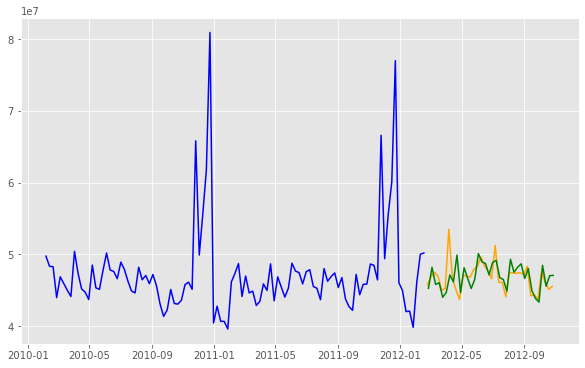

In [107]:
from sklearn.metrics import mean_squared_error
date_list =  pd.date_range(start, periods=36, freq ='W')
preds = pd.DataFrame(preds.values, index=date_list, columns = ['Weekly Sales'])

# Evaluate predictions.
print(mean_squared_error(pd.DataFrame(test), preds))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train, color = 'blue')
plt.plot(test, color = 'orange')
plt.plot(preds, color = 'green')
plt.show();

In [108]:


from sklearn.metrics import mean_squared_error

round(mean_squared_error(pd.DataFrame(test), preds),2)

2961310532376.46

2961310532376.455


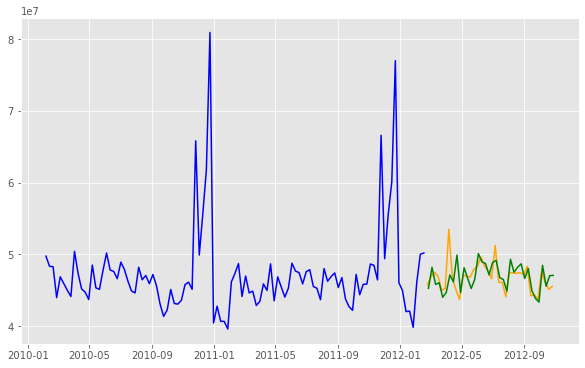

In [109]:
preds = pd.DataFrame(preds.values, index=date_list, columns = ['Weekly Sales'])

# Evaluate predictions.
print(mean_squared_error(pd.DataFrame(test), preds))

# Plot data.
plt.figure(figsize=(10,6))
plt.plot(train, color = 'blue')
plt.plot(test, color = 'orange')
plt.plot(preds, color = 'green')
plt.show();

In [111]:
import arch


# Define the model
model = arch.arch_model(train, vol='GARCH', p=1, q=1)

# Fit the model
results = model.fit()

# View summary statistics
print(results.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 1818.2302056494948
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1799.9302962482711
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1799.7047201791997
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1799.655170925584
Iteration:      5,   Func. Count:     29,   Neg. LLF: 1799.6551709256698
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1799.655170925584
            Iterations: 5
            Function evaluations: 29
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:           Weekly_Sales   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1799.66
Distribution:                  Normal   AIC:                           3607.31
Method:            Maximum Likelih

These results indicate that a GARCH model with a constant mean has been fitted to a dataset of 107 observations of weekly sales data. The negative log-likelihood (Neg. LLF) decreases with each iteration, indicating that the optimization algorithm is making progress towards finding the optimal parameter values. The optimization terminated successfully after 5 iterations, and the final log-likelihood is -1799.66.

The model has a constant mean, which is estimated to be 4.7218e+07. The volatility model is a GARCH model with omega=3.7990e+12, alpha=0.3262, and beta=0.6148. These coefficients are estimated using maximum likelihood estimation. The estimated coefficients suggest that the conditional variance of the sales data is persistent (beta>0), with a relatively small effect of past squared errors (alpha<1).

The AIC and BIC are 3607.31 and 3618.00, respectively, which are measures of the goodness of fit of the model. The AIC and BIC indicate that this model is preferred over other models with higher AIC and BIC values.

Finally, the covariance estimator is robust, indicating that the standard errors and test statistics are robust to heteroskedasticity and other forms of model misspecification.

In [112]:
model = arch.arch_model(train, vol='GARCH', p=1, o=0, q=1)
results = model.fit()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 1818.2302056494948
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1799.9302962482711
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1799.7047201791997
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1799.655170925584
Iteration:      5,   Func. Count:     29,   Neg. LLF: 1799.6551709256698
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1799.655170925584
            Iterations: 5
            Function evaluations: 29
            Gradient evaluations: 5


In [113]:
forecasts = results.forecast(horizon=30)
forecast_variances = forecasts.variance.values[-1, :]


ValueError: 'y1' is not 1-dimensional

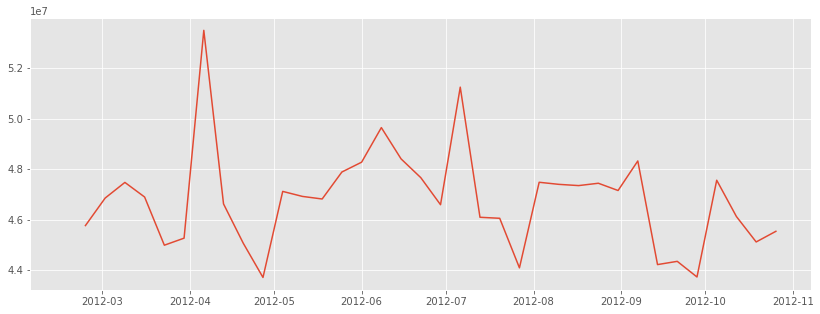

In [114]:
fig, ax = plt.subplots()
ax.plot(test, label='Actual')
ax.plot(forecasts.mean, label='Predicted')
ax.fill_between(forecasts.mean.index,
                forecasts.mean - 2*np.sqrt(forecast_variances),
                forecasts.mean + 2*np.sqrt(forecast_variances),
                alpha=0.2, color='gray')
ax.legend()
plt.show()
